<a href="https://colab.research.google.com/github/bcataldo3/plantilla_curso_python/blob/main/docs/Clase_11 - Deteccion de Anomalias - Estimacion Densidad del Kernel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deteccion de Anomalias - Estimacion Densidad del Kernel
## Formulación Matemática
La solución al problema de la discontinuidad de los histogramas puede abordarse de manera efectiva con un método simple. Dada una muestra $x_i ∈ X$, es posible considerar un hipervolumen (normalmente un hipercubo o una hiperesfera), asumiendo que estamos trabajando con distribuciones multivariadas, cuyo centro es $x_i$. La extensión de esa región se define a través de una constante $h$ llamada ancho de banda (el nombre se ha elegido para apoyar el significado de un área limitada donde el valor es positivo). Sin embargo, en lugar de simplemente contar el número de muestras que pertenecen al hipervolumen, ahora aproximamos este valor utilizando una función núcleo suave $K(x_i; h)$ con algunas características importantes:

$K(\bar{x};h) \: \text{ is positive with } \: K(\bar{x};h)=K(-\bar{x};h)$

Además, por razones estadísticas y prácticas, también es necesario hacer cumplir las siguientes restricciones integrales (por simplicidad, se muestran solo para un caso univariado, pero la extensión es directa).

$\int\limits_{-\infty}^{\infty}K(x; h)\: dx=1$

$\int\limits_{-\infty}^{\infty}x^2K(x; h)\: dx=1$

$\int\limits_{-\infty}^{\infty}x^tK(x; h)\: dx<\infty \: \text{ if } t \in [0,\infty) $

Ahora, revisemos ejemplos de funciones de kernel habituales

### Kernel Guasiano

Uno de los más empleados, cuya fórmula es la siguiente:

$$\large K(\bar{x};h)=\frac{1}{\sqrt[n]{2\pi h^2}e^{-\frac{\bar{x}^T\bar{x}}{2h^2}}}$$

<img src="https://drive.google.com/uc?export=view&id=1dzJ7qcpci9XkPlAlZ7HSmrU2KZU2YmrW" width = "800" align="center"/>


Dada su regularidad, un núcleo gaussiano es una elección común para muchas tareas de estimación de densidad. Sin embargo, dado que el método no permite la combinación de diferentes núcleos, la elección debe considerar todas las propiedades. Desde el punto de vista estadístico, sabemos que una distribución gaussiana puede considerarse como una referencia promedio para la curtosis (que es proporcional al pico y a la pesadez de las colas). Para maximizar la selectividad del núcleo, necesitamos reducir el ancho de banda. Esto significa que incluso las oscilaciones más pequeñas alterarán la densidad y el resultado será una estimación muy irregular. Por otro lado, cuando h es grande (es decir, la varianza de la gaussiana), la aproximación se vuelve muy suave y puede perder la capacidad de capturar todos los picos. Por esta razón, junto con la selección del ancho de banda más apropiado, también es útil considerar otros núcleos que puedan simplificar naturalmente el proceso.

### Kernel Epanechnikov
Este núcleo ha sido propuesto para minimizar el error cuadrático medio, y además tiene la propiedad de ser muy regular (de hecho, se puede imaginar como una parábola invertida). La fórmula es la siguiente:

$$\large K(\bar{x};h)=\epsilon(1-\frac{x^2}{h^2}) \: \text{ for } \: |x|<1$$

La constante $ε$ se ha introducido para normalizar el núcleo y cumplir con todos los requisitos (de manera análoga, es posible extender el núcleo en el rango $(-h, h)$ para ser más consistente con otras funciones). Se muestra una representación gráfica en la siguiente captura de pantalla:


<img src="https://drive.google.com/uc?export=view&id=1T7xcdMJG_ocdiL0uTua1Lg5ZVAu0LdXu" width = "800" align="center"/>

El núcleo puede volverse muy puntiagudo cuando $h → 0$. Sin embargo, dada su estructura matemática, siempre permanecerá muy regular; por lo tanto, en la mayoría de los casos, no es necesario usarlo como reemplazo del núcleo gaussiano (aunque este último tenga un error cuadrático medio ligeramente mayor). Además, como la función es discontinua en $x = ± h$ $(K(x; h) = 0 $ para $|x| > h$), puede causar caídas rápidas en la estimación de densidad, especialmente en los límites, donde, por ejemplo, una función gaussiana disminuye muy suavemente.


### Kernel Exponencial
Un núcleo muy puntiagudo es el exponencial. A diferencia del núcleo gaussiano, este núcleo tiene colas muy pesadas y un pico agudo.

$$\large K(\bar{x};h)=\epsilon \: e^{-\frac{|x|}{h}}$$

<img src="https://drive.google.com/uc?export=view&id=1fQ1B4ezA26xQ6W2hfvJoLQexAU6kQtXX" width = "800" align="center"/>

Como se puede observar, dicha función es adecuada para modelar distribuciones muy irregulares con una densidad altamente concentrada alrededor de puntos específicos. Por otro lado, el error puede volverse muy alto cuando el proceso de generación de datos es bastante regular con superficies suaves.

### Kernel Uniforme

Esta es la función de núcleo más simple y menos suave, y su uso se asemeja al procedimiento estándar de construir un histograma. Su fórmula matemática es la siguiente.

$$\large K(\bar{x};h)=\frac{1}{2h} \: \text{ for }\: |x|<h$$

Que corresponde a un escalón que es constante en el rango delimitado por el ancho de banda, y solo es útil cuando la estimación no necesita ser suave.

### Medidas de Evaluación
Una buena medida teórica que se puede emplear para evaluar el rendimiento de un núcleo (y un ancho de banda) es el error cuadrático medio integrado (MISE, por sus siglas en inglés), definido de la siguiente manera.

$$\large MISE(K) = \mathbb{E}\biggl[\int\limits_{-\infty}^{\infty}(p_K(x)-p(x))^2 dx\biggr]$$

En la fórmula anterior, $p_K(x)$ es la densidad estimada, mientras que $p(x)$ es la real. Desafortunadamente, $p(x)$ es desconocida (de lo contrario, no necesitaríamos ninguna estimación); por lo tanto, este método solo se puede utilizar para evaluaciones teóricas (por ejemplo: la optimalidad del núcleo Epanechnikov). Sin embargo, es fácil entender que el $MISE$ será mayor siempre que el núcleo no pueda aproximarse a la superficie real. Dado que el núcleo exponencial salta hacia un pico muy abruptamente, solo puede ser adecuado en situaciones específicas. En todos los demás casos, su comportamiento conduce a $MISE$s más grandes, y por lo tanto, otros núcleos son preferibles.

## Estimación de la Función de Densidad
### Fundamentos Matemáticos de la Estimación
Una vez que se ha seleccionado una función de núcleo, es posible construir una aproximación completa de una función de densidad de probabilidad utilizando un enfoque de k-NN (k-Nearest Neighbour en inglés) o  K-vecinos mas cercanos en español, es un algoritmo simple y efectivo utilizado para la clasificación y regresión en aprendizaje supervisado. Su idea central es clasificar un punto de datos nuevo basándose en la mayoría de los puntos de datos cercanos a él en el espacio de características.

De hecho, dado un conjunto de datos $X$ (para simplificar, $X ∈ ℜ^m$, por lo que los valores son números reales), es fácil crear, por ejemplo, un árbol de bolas para dividir los datos de manera eficiente. Cuando la estructura de datos está lista, es posible obtener todos los vecinos del punto de consulta $x_j$ dentro de un radio definido por el ancho de banda. Supongamos que dicho conjunto es $X_j = \{x_1,\dotsc, x_t\}$ y el número de puntos es Nj. La estimación de la densidad de probabilidad se obtiene de la siguiente manera:

$$ p_K(x_j)=\frac{1}{N_jh}\sum\limits_{t}K\biggl( \frac{x_j-x_t}{h};h \biggr)$$

No es difícil demostrar que, si el ancho de banda se elige adecuadamente (como una función del número de muestras contenidas en el vecindario), $p_K$ converge en probabilidad a la verdadera $p(x)$. En otras palabras, si la granularidad es lo suficientemente grande, el error absoluto entre la aproximación y la verdadera densidad tiende a cero.

### Enfoque KNN y Elección de la Métrica de Distancia
En este punto, es natural preguntarse por qué no usar todo el conjunto de datos para cada consulta en lugar de un enfoque de k-NN. La respuesta es muy simple y se basa en la suposición de que el valor de la función de densidad calculada en $x_j$ puede interpolarse fácilmente utilizando el comportamiento local (es decir, para una distribución multivariante, una bola centrada en $x_j$) y que los puntos lejanos no tienen influencia en la estimación. Por lo tanto, podemos limitar el cálculo a un subconjunto más pequeño de $X$, evitando incluir contribuciones que están cerca de cero.

Antes de discutir cómo determinar el ancho de banda óptimo, mostremos la estimación de densidad (utilizando ``scikit-learn``) para el conjunto de datos previamente definido. Como no tenemos ningún conocimiento previo específico, vamos a utilizar un núcleo gaussiano con diferentes anchos de banda (0.1, 0.5 y 1.5). Todos los demás parámetros se mantienen en sus valores predeterminados; sin embargo, la clase ``KernelDensity`` permite establecer la métrica (predeterminada es ``metric='euclidean'``), la estructura de datos (predeterminada es ``algorithm='auto'``, que realiza una autoselección entre árbol de bolas y ``kd-tree`` según la dimensionalidad), y las tolerancias absolutas y relativas (respectivamente, 0 y 10^-8). En muchos casos, no es necesario cambiar los valores predeterminados; sin embargo, para conjuntos de datos muy grandes con características específicas, puede ser útil, por ejemplo, cambiar el parámetro ``leaf_size`` para mejorar el rendimiento. Además, la métrica predeterminada puede no ser adecuada para todas las tareas (por ejemplo: la documentación estándar muestra un ejemplo basado en la distancia de Haversine, que se puede utilizar al trabajar con latitud y longitud). Otros casos son aquellos en los que, en lugar de bolas, es preferible trabajar con hipercubos (este es el caso con la distancia de Manhattan).

## Estimación Densidad Data ``ages``
Comenzamos montando la densidad gaussiana para el conjunto ficticio que hemos creado (data ``ages``). Primero, volvemos a generar la data con el siguiente código.

In [1]:
# Importe librerias
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KernelDensity

# Establecemos una semilla para reproducibilidad
np.random.seed(1000)

# Generacion del dataset artificial ages
nb_samples = [1000, 800, 500, 380, 280, 150, 120, 100, 50, 30]
ages = []
for n in nb_samples:
    i = np.random.uniform(10, 80, size=2)
    a = np.random.uniform(i[0], i[1], size=n).astype(np.int32)
    ages.append(a)
ages = np.concatenate(ages)

Ahora realizamos la estimación de la densidad para 3 valores de $h$ (0.1, 0.5 y 1.5). Se puede ver la gráfica de los distintos valores de $h$ a continuación.

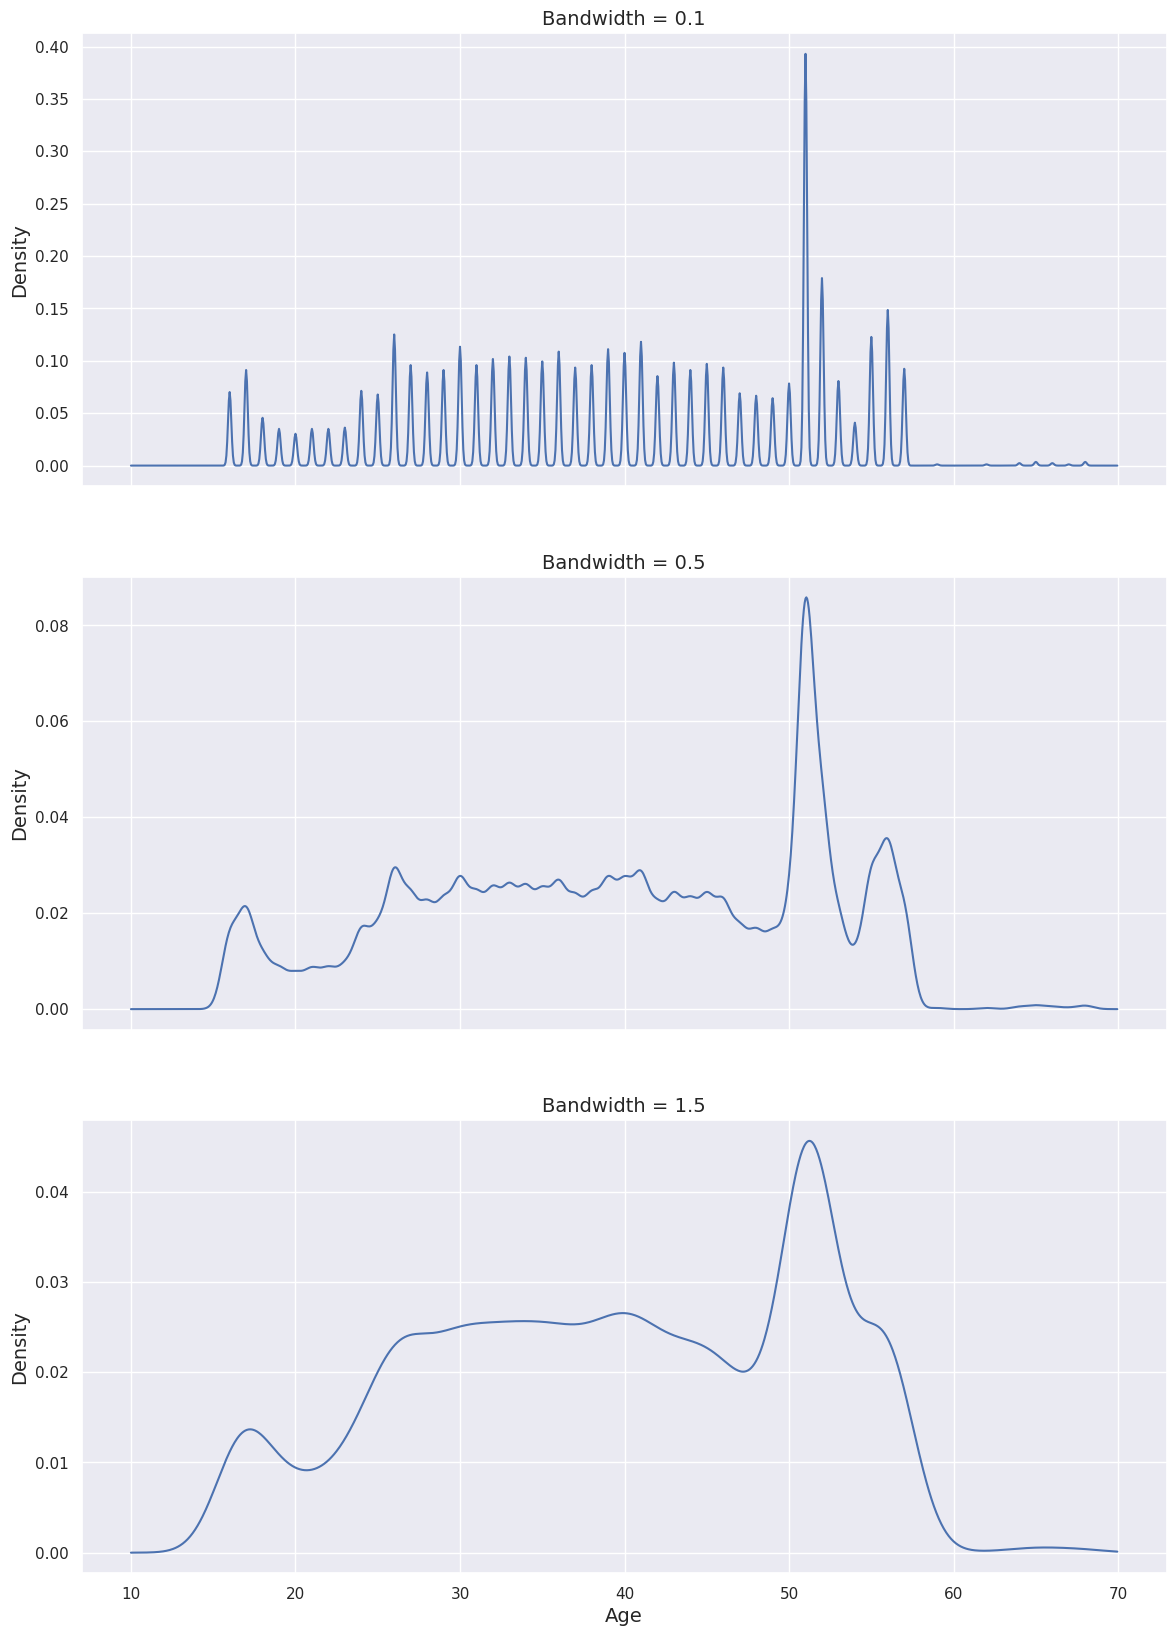

In [2]:
# Entrenamos el KDE con un kernel gausiano y 3 anchos de banda
kd_01 = KernelDensity(kernel='gaussian', bandwidth=0.1)
kd_05 = KernelDensity(kernel='gaussian', bandwidth=0.5)
kd_15 = KernelDensity(kernel='gaussian', bandwidth=1.5)
kd_01.fit(ages.reshape(-1, 1))
kd_05.fit(ages.reshape(-1, 1))
kd_15.fit(ages.reshape(-1, 1))

# Mostra mos los resultados
sns.set()
fig, ax = plt.subplots(3, 1, figsize=(14, 20), sharex=True)
data = np.arange(10, 70, 0.05).reshape(-1, 1)
ax[0].plot(data, np.exp(kd_01.score_samples(data)))
ax[0].set_title('Bandwidth = 0.1', fontsize=14)
ax[0].set_ylabel('Density', fontsize=14)
ax[1].plot(data, np.exp(kd_05.score_samples(data)))
ax[1].set_title('Bandwidth = 0.5', fontsize=14)
ax[1].set_ylabel('Density', fontsize=14)
ax[2].plot(data, np.exp(kd_15.score_samples(data)))
ax[2].set_title('Bandwidth = 1.5', fontsize=14)
ax[2].set_xlabel('Age', fontsize=14)
ax[2].set_ylabel('Density', fontsize=14)
plt.show()

Como se puede observar, cuando el ancho de banda es muy pequeño (0.1), la densidad presenta fuertes oscilaciones debido a la falta de muestras para rangos específicos. Cuando $h$ = 0.5, la forma (ya que el conjunto de datos es univariado) se vuelve más estable, pero aún hay algunas variaciones rápidas residuales inducidas por la varianza interna de los vecinos. Este comportamiento se elimina casi por completo cuando $h$ se vuelve más grande (1.5, en nuestro caso).

### Estimación de $h$

Una pregunta obvia es: ¿cómo es posible determinar el ancho de banda más apropiado? Por supuesto, la elección más natural es el valor de $h$ que minimiza el MISE, pero, como se discutió, este método solo se puede emplear cuando se conoce la verdadera densidad de probabilidad. Sin embargo, hay un par de criterios empíricos que se han demostrado ser muy confiables. Dado un conjunto de datos completo $X ∈ ℜ^m$, el primero se basa en la siguiente fórmula.

#### Método 1
$h=1.06 \:\cdot\: std(X)\:\cdot\:m^{-0.2}$

Por lo tanto, la sugerencia es aumentar aún más el ancho de banda en comparación con nuestro último experimento. Un segundo método se basa en el rango intercuartil (IQR = Q3 - Q1 o, de manera equivalente, percentil 75 - percentil 25), y es más robusto frente a variaciones internas muy intensas.

#### Método 2
$h=0.9 \:\cdot\: \min \biggl(std(X),{\Large\frac{IQR}{1.34}} \biggr) \:\cdot\: m^{-0.2}$

El código y resultados son los siguientes.

In [3]:
# Ancho de banda optimo: metodo 1
N = float(ages.shape[0])
h = 1.06 * np.std(ages) * np.power(N, -0.2)
print('h = {:.3f}'.format(h))
# Ancho de banda optimo: metodo 2
IQR = np.percentile(ages, 75) - np.percentile(ages, 25)
h = 0.9 * np.min([np.std(ages), IQR / 1.34]) * np.power(N, -0.2)
print('h = {:.3f}'.format(h))

h = 2.415
h = 2.051


El segundo método es bastante menor que el anterior, lo que indica que $p_K(x)$ puede ser más preciso con hipervolúmenes más pequeños. Como regla general, sugiero seleccionar el método con el ancho de banda más pequeño, incluso si el segundo método generalmente brinda los mejores resultados en diferentes contextos. Ahora realicemos nuevamente la estimación, utilizando $h = 2.0$ y los núcleos Gaussiano, Epanechnikov y Exponencial (excluimos el uniforme porque el resultado final es equivalente a un histograma).

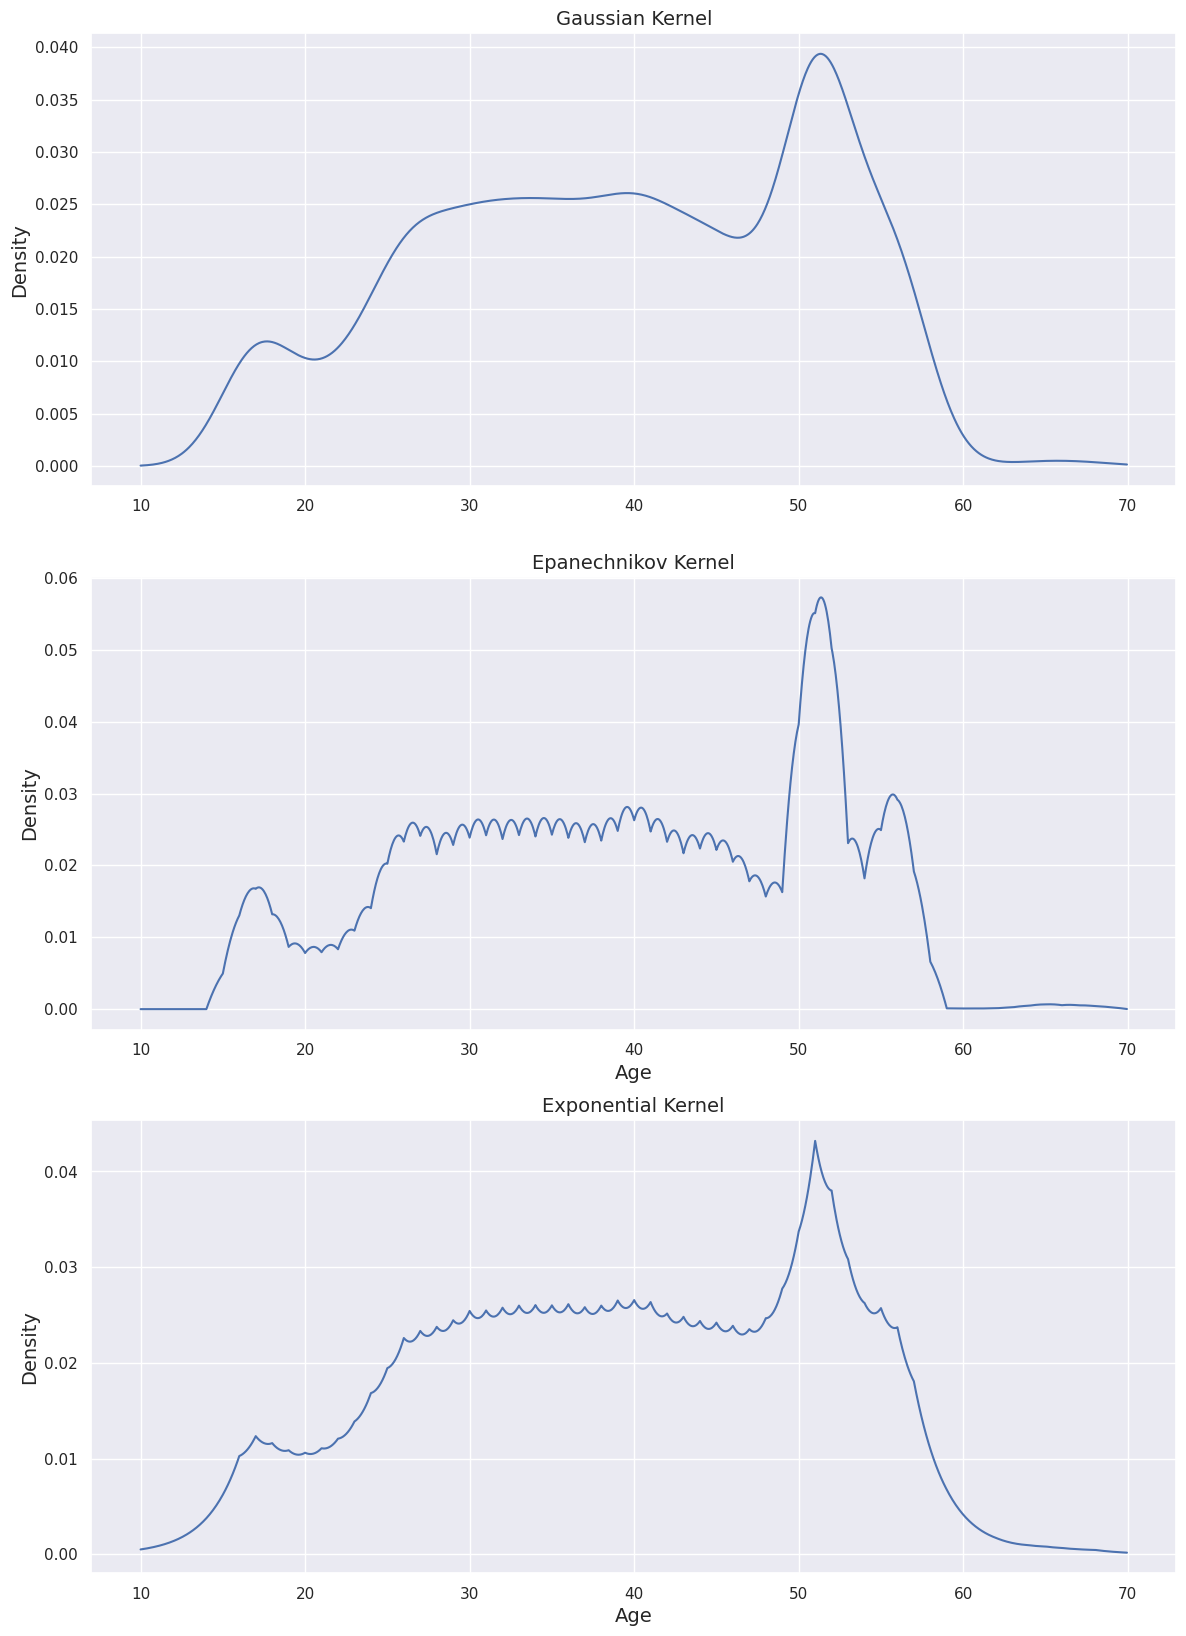

In [5]:
# Entrenamos el KDE con diferentes kernels y ancho de banda=2.0
kd_gaussian = KernelDensity(kernel='gaussian', bandwidth=2.0)
kd_epanechnikov = KernelDensity(kernel='epanechnikov', bandwidth=2.0)
kd_exponential = KernelDensity(kernel='exponential', bandwidth=2.0)
kd_gaussian.fit(ages.reshape(-1, 1))
kd_epanechnikov.fit(ages.reshape(-1, 1))
kd_exponential.fit(ages.reshape(-1, 1))

# Mostra mos los resultados
fig, ax = plt.subplots(3, 1, figsize=(14, 20), sharex=False)
data = np.arange(10, 70, 0.05).reshape(-1, 1)
ax[0].plot(data, np.exp(kd_gaussian.score_samples(data)))
ax[0].set_title('Gaussian Kernel', fontsize=14)
ax[0].set_ylabel('Density', fontsize=14)
ax[1].plot(data, np.exp(kd_epanechnikov.score_samples(data)))
ax[1].set_title('Epanechnikov Kernel', fontsize=14)
ax[1].set_ylabel('Density', fontsize=14)
ax[1].set_xlabel('Age', fontsize=14)
ax[2].plot(data, np.exp(kd_exponential.score_samples(data)))
ax[2].set_title('Exponential Kernel', fontsize=14)
ax[2].set_xlabel('Age', fontsize=14)
ax[2].set_ylabel('Density', fontsize=14)
plt.show()

### Conclusiones
Como era de esperar, los núcleos Epanechnikov y Exponencial presentan más oscilaciones que el núcleo Gaussiano (porque tienden a ser más puntiagudos cuando $h$ es pequeño); sin embargo, es evidente que el gráfico central es seguramente el más preciso (en términos de MISE). Un resultado similar se logró previamente con un núcleo Gaussiano y $h = 0.5$, pero, en ese caso, las oscilaciones eran extremadamente irregulares. Como se explicó, el núcleo Epanechnikov tiene una tendencia discontinua muy fuerte cuando el valor alcanza los límites del ancho de banda.

Este fenómeno se puede entender de inmediato al observar los extremos de la estimación, que caen casi verticalmente a cero. Por el contrario, la estimación Gaussiana con $h = 2$ parece ser muy suave y no captura la variación entre 50 y 60 años. Lo mismo ocurre con el núcleo Exponencial, que también muestra su comportamiento peculiar: extremos muy puntiagudos. En el siguiente ejemplo, vamos a emplear el núcleo Epanechnikov; sin embargo, invito al lector a verificar también los resultados para el núcleo Gaussiano con diferentes anchos de banda.

Esta elección tiene una lógica precisa (que no puede descartarse sin una razón sólida): estamos considerando el conjunto de datos como exhaustivo y queremos penalizar todas las muestras que superan los límites naturales. En todos los demás escenarios, se puede preferir una probabilidad residual muy pequeña; sin embargo, tal elección debe hacerse considerando cada objetivo específico.


## Detección de Anomalías
Ahora vamos a aplicar la estimación de densidad de Epanechnikov para realizar un ejemplo de detección de anomalías. Según la estructura de la densidad de probabilidad, hemos decidido imponer un límite en $p(x) < 0.005$.

In [6]:
# Ejecucion de la deteccion de anomalias en un dataset ficticio
test_data = np.array([12, 15, 18, 20, 25, 30, 40, 50, 55, 60, 65, 70, 75, 80, 85, 90]).reshape(-1, 1)
test_densities_epanechnikov = np.exp(kd_epanechnikov.score_samples(test_data))
test_densities_gaussian = np.exp(kd_gaussian.score_samples(test_data))
for age, density in zip(np.squeeze(test_data), test_densities_epanechnikov):
    print('p(Age = {:d}) = {:.7f} ({})'.format(age, density, 'Anomaly' if density < 0.005 else 'Normal'))

p(Age = 12) = 0.0000000 (Anomaly)
p(Age = 15) = 0.0049487 (Anomaly)
p(Age = 18) = 0.0131965 (Normal)
p(Age = 20) = 0.0078079 (Normal)
p(Age = 25) = 0.0202346 (Normal)
p(Age = 30) = 0.0238636 (Normal)
p(Age = 40) = 0.0262830 (Normal)
p(Age = 50) = 0.0396169 (Normal)
p(Age = 55) = 0.0249084 (Normal)
p(Age = 60) = 0.0000825 (Anomaly)
p(Age = 65) = 0.0006598 (Anomaly)
p(Age = 70) = 0.0000000 (Anomaly)
p(Age = 75) = 0.0000000 (Anomaly)
p(Age = 80) = 0.0000000 (Anomaly)
p(Age = 85) = 0.0000000 (Anomaly)
p(Age = 90) = 0.0000000 (Anomaly)


Como se puede ver, la caída abrupta de la función ha creado una especie de separación vertical. Una persona de 15 años está casi en el límite ($p(15) ≈ 0.0049$), mientras que el comportamiento es aún más drástico para el límite superior. El límite es de aproximadamente 58 años, pero una muestra de 60 años es aproximadamente 10 veces menos probable que una de 57 años (esto también se confirma por el histograma inicial). Dado que este es solo un ejemplo didáctico, es muy fácil detectar las anomalías; sin embargo, incluso una distribución ligeramente más compleja podría crear algunos problemas sin un algoritmo estandarizado. En particular, en este caso específico, que es una distribución univariada simple, las anomalías generalmente se encuentran en las colas.

Además, estamos asumiendo que la pensidad $p_K(x)$ cumple con

$p_K(x_a) \leqslant p_K(x_n) \:\:\: \forall \: x_a \in Anomalies \subseteq X \: \text{ and } \: x_n \in X$

Este comportamiento no es generalmente cierto al considerar un conjunto de datos que contiene todas las muestras (tanto las normales como las anomalías), y el científico de datos debe tener cuidado al decidir los umbrales. Incluso si puede ser obvio, es una buena idea aprender la distribución normal eliminando todas las anomalías del conjunto de datos para aplanar ($p_K(x) → 0$) las regiones donde se encuentran las anomalías. De esta manera, el criterio anterior sigue siendo válido, y es fácil comparar diferentes densidades para hacer una distinción.

Se sugiere, como ejercicio, modificar la distribución inicial creando agujeros artificiales y estableciendo diferentes umbrales para la detección. Además, invito al lector a generar una distribución bivariada (por ejemplo: basada en la suma de algunas distribuciones gaussianas) basada, por ejemplo, en la edad y la altura, y crear un modelo simple que sea capaz de detectar a todas las personas cuyos parámetros son muy improbables.